<a href="https://colab.research.google.com/github/Jacksonpardo/datos/blob/main/Trabajo_final_python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data de maratón

<p>Arreglo de la data, es decir relleno con 0s y convierto de únicos datos cualitativos a únicos datos cuantitativos.</p>

In [ ]:

import pandas as pd

datos_maraton=pd.read_csv('https://raw.githubusercontent.com/Jacksonpardo/datos/main/MarathonData.csv')
#display(datos_maraton)
datos_maraton['Wall21'] = pd.to_numeric(datos_maraton['Wall21'],errors='coerce')

#Elimino las columnas innecesarias
datos_maraton = datos_maraton.drop(columns=['Name'])
datos_maraton = datos_maraton.drop(columns=['id'])
datos_maraton = datos_maraton.drop(columns=['Marathon'])
datos_maraton = datos_maraton.drop(columns=['CATEGORY'])

#Relleno con 0s los espacios en blancoy elimino los que no
datos_maraton["CrossTraining"] = datos_maraton["CrossTraining"].fillna(0)
#datos_maraton = datos_maraton.dropna(how='any')

datos_maraton["Category"] = datos_maraton["Category"].fillna(0)
#datos_maraton = datos_maraton.dropna(how='any')

datos_maraton["Wall21"] = datos_maraton["Wall21"].fillna(0)
#datos_maraton = datos_maraton.dropna(how='any')

#Doy valores a únicos datos
valores_cross = {"CrossTraining":  {'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
datos_maraton.replace(valores_cross, inplace=True)

valores_categoria = {"Category":  {'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5,'WAM':6}}
datos_maraton.replace(valores_categoria, inplace=True)
display(datos_maraton.head(87))


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


##Gráficas

####Comparando 2 variabales

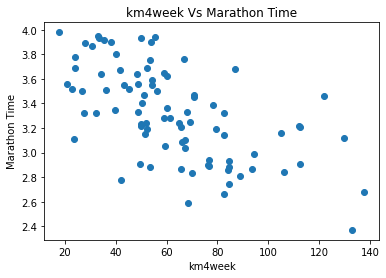

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x = datos_maraton['km4week'], y=datos_maraton['MarathonTime'])
plt.title('km4week Vs Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()

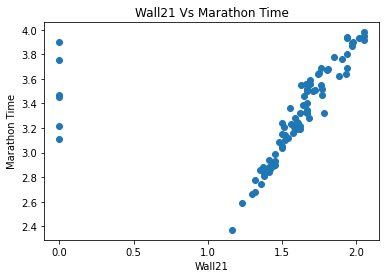

In [ ]:
plt.scatter(x = datos_maraton['Wall21'], y=datos_maraton['MarathonTime'])
plt.title('Wall21 Vs Marathon Time')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

####De dispersión

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


px.scatter(x= list(datos_maraton['km4week']), y = list(datos_maraton['MarathonTime']), color_discrete_sequence  = ['rgb(255,0,0)'])

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


fig=px.scatter(datos_maraton,x='Category',y='MarathonTime',color='Wall21', size='km4week')
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

fig2=px.scatter(datos_maraton,x='Category',y='MarathonTime',symbol='sp4week')
fig2.update_traces(marker_size=10) #Cambiar el tamaño del marcador
fig2.show()

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

fig3=px.scatter(datos_maraton,x='Category',y='MarathonTime',color='sp4week',facet_col='CrossTraining')
fig3.show()

#facet_col (Usado para ver en columnas)
#facet_roe (Usado para ver en filas)

##Estadísticas

In [ ]:
datos_maraton.describe()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1.954023,62.347126,139.840706,0.436782,1.518161,3.319080
std,1.469916,26.956019,1191.427864,1.138146,0.462522,0.376923
min,0.000000,17.900000,8.031414,0.000000,0.000000,2.370000
25%,1.000000,44.200000,11.498168,0.000000,1.440000,3.045000
50%,1.000000,58.800000,12.163424,0.000000,1.610000,3.320000
75%,3.000000,77.500000,12.854036,0.000000,1.755000,3.605000
max,6.000000,137.500000,11125.000000,5.000000,2.050000,3.980000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f616542e410>,
      dtype=object)

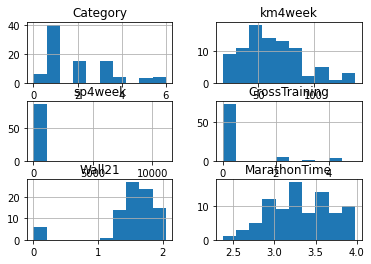

In [ ]:
datos_maraton.hist()

In [ ]:
import plotly.figure_factory as ff

time_arr_list=[np.array(datos_maraton['MarathonTime'])]
group_labels=['Tiempos de maratón']
fig9=ff.create_distplot(time_arr_list,group_labels,bin_size=0.15) #bin_size me va a determinar el tamaño de la distribución de los datos
fig9.show()

In [ ]:
fig8=px.histogram(datos_maraton,x='MarathonTime',nbins=16)
fig8.show()

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

fig11 =px.scatter(datos_maraton,x='MarathonTime',y='Wall21',trendline='lowess')
fig11.show()

##Modelos


###Random Forest Regressor

In [ ]:
##RANDOM FOREST REGRESSOR

from sklearn import datasets #Me devolverá valores de X features y "y" target para el dataset que importaré. NO me devuelve un df.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score,mean_squared_error

Category=np.array(datos_maraton['Category'])	
km4week=np.array(datos_maraton['km4week'])
sp4week=np.array(datos_maraton['sp4week'])
CrossTraining=np.array(datos_maraton['CrossTraining'])
Wall21=np.array(datos_maraton['Wall21'])
X=np.c_[Category,km4week,sp4week,CrossTraining,Wall21]
#print(x)
y=np.array(datos_maraton['MarathonTime'])
print(np.shape(X))
print(np.shape(y))

Xtrain,Xtest,ytrain,ytest=tts(X,y)
modelRF = RFR(random_state=42)
modelRF.fit(Xtrain,ytrain)
##Verificamos los resultados
ypred= modelRF.predict(Xtest)
r2RF=r2_score(ytest,ypred)
print('R2 de validación')
print(r2RF) #Validación
 ## Como evalúo si existe subajuste o sobreajuste
 ## Comparar los resultados de entrenamiento y los de prueba
#Existe subajuste cuando mi r2 estrá entre [0-0.5]
ypredtrain= modelRF.predict(Xtrain)
r2RT=r2_score(ytrain,ypredtrain)
print('R2 de entrenamiento: ')
print(r2RT) #Entrenamiento

(87, 5)
(87,)
R2 de validación
0.8757639078837844
R2 de entrenamiento: 
0.9788690190726409


In [ ]:
##PROBANDO EL MODELO
print('Podrías intentar con 1-400-20-0-1.4')
aaa=input('Ingresa valor para Category:' )
bbb=input('Ingresa valor para km4week:')
ccc=input('Ingresa valor para sp4week:')
ddd=input('Ingresa valor para CrossTraining:')
eee=input('Ingresa valor para Wall21:')
novo_dato = pd.DataFrame(np.array([[aaa,bbb,ccc,ddd,eee]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
display(novo_dato)
print('La predicción es: ')
modelRF.predict(novo_dato)

Podrías intentar con 1-400-20-0-1.4
Ingresa valor para Category:1
Ingresa valor para km4week:400
Ingresa valor para sp4week:20
Ingresa valor para CrossTraining:0
Ingresa valor para Wall21:1.4


,Category,km4week,sp4week,CrossTraining,Wall21
0,1,400,20,0,1.4


La predicción es: 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



array([2.7982])

###Knieghbors Regressor

In [ ]:
###KNEIGHBORS REGRESSOR


from sklearn.neighbors import KNeighborsRegressor as KNr
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split as tts
from pandas.core.common import random_state
from sklearn import neighbors

Category=np.array(datos_maraton['Category'])	
km4week=np.array(datos_maraton['km4week'])
sp4week=np.array(datos_maraton['sp4week'])
CrossTraining=np.array(datos_maraton['CrossTraining'])
Wall21=np.array(datos_maraton['Wall21'])
X=np.c_[Category,km4week,sp4week,CrossTraining,Wall21]
y=np.array(datos_maraton['MarathonTime'])
print(np.shape(X))
print(np.shape(y))

Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=0.2,random_state=42)
modelknnr=KNr(n_neighbors=1) #KNeighborsRegressor(n_neighbors=1)
modelknnr.fit(Xtrain,ytrain)

print('Valor máximo: ')
print(np.max(X))
print('Valor mínimo: ')
print(np.min(X))
ypredtrain=modelknnr.predict(Xtrain)
ypredtest=modelknnr.predict(Xtest)
r2modelknntrain=r2_score(ytrain,ypredtrain)
r2modelknntest=r2_score(ytest,ypredtest)
print('Error de entrenamiento')
print(r2modelknntrain)
print('Error de validación')
print(r2modelknntest)

Xr=np.linspace(90,1000,70) #Con este realizaremos el gráfico de dispersión
Xr=np.reshape(Xr,(70,1))
"""
Xtrainr = np.reshape(Xtrain,(345,))
ytrainr = np.reshape(ytrain,(69,))
yr =modelknnr.predict(X)
Xrr = np.reshape(Xr,(70,))
yrr = np.reshape(yr,(87,))
Xtestr = np.reshape(Xtest,(90,))
ytestr = np.reshape(ytest,(18,))

#Dibujo
print('Gráfica')
fig1=go.Figure()
fig1.add_trace(go.Scatter(x=Xtrainr,y = ytrainr, mode ='markers',marker_color = 'red'))
fig1.add_trace(go.Scatter(x=Xrr,y = yrr))
fig1.add_trace(go.Scatter(x = Xtestr, y= ytestr, mode = 'markers', marker_color = 'blue'))
fig1.show()
"""

(87, 5)
(87,)
Valor máximo: 
11125.0
Valor mínimo: 
0.0
Error de entrenamiento
1.0
Error de validación
0.638347911554861


"\nXtrainr = np.reshape(Xtrain,(345,))\nytrainr = np.reshape(ytrain,(69,))\nyr =modelknnr.predict(X)\nXrr = np.reshape(Xr,(70,))\nyrr = np.reshape(yr,(87,))\nXtestr = np.reshape(Xtest,(90,))\nytestr = np.reshape(ytest,(18,))\n\n#Dibujo\nprint('Gráfica')\nfig1=go.Figure()\nfig1.add_trace(go.Scatter(x=Xtrainr,y = ytrainr, mode ='markers',marker_color = 'red'))\nfig1.add_trace(go.Scatter(x=Xrr,y = yrr))\nfig1.add_trace(go.Scatter(x = Xtestr, y= ytestr, mode = 'markers', marker_color = 'blue'))\nfig1.show()\n"

In [ ]:
###PROBANDO EL MODELO
print('Podrías intentar con 1-400-20-0-1.4')
a=input('Ingresa valor para Category:' )
b=input('Ingresa valor para km4week:')
c=input('Ingresa valor para sp4week:')
d=input('Ingresa valor para CrossTraining:')
e=input('Ingresa valor para Wall21:')
new_dato = pd.DataFrame(np.array([[a,b,c,d,e]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
display(new_dato)
print('La predicción es:')
modelknnr.predict(new_dato)

Podrías intentar con 1-400-20-0-1.4
Ingresa valor para Category:1
Ingresa valor para km4week:400
Ingresa valor para sp4week:20
Ingresa valor para CrossTraining:0
Ingresa valor para Wall21:1.4


,Category,km4week,sp4week,CrossTraining,Wall21
0,1,400,20,0,1.4


La predicción es:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but KNeighborsRegressor was fitted without feature names



array([2.68])

###Ridge vs Lasso

In [ ]:
###RIDGE VS LASSO



from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
Category=np.array(datos_maraton['Category'])	
km4week=np.array(datos_maraton['km4week'])
sp4week=np.array(datos_maraton['sp4week'])
CrossTraining=np.array(datos_maraton['CrossTraining'])
Wall21=np.array(datos_maraton['Wall21'])
Xla=np.c_[Category,km4week,sp4week,CrossTraining,Wall21]

yla=np.array(datos_maraton['MarathonTime'])
print(np.shape(X))
print(np.shape(y))
yla=np.reshape(yla,(87,1))

Xlatrain, Xlatest, ylatrain, ylatest=tts(Xla, yla,test_size=0.20,random_state=42)
modelRidge=Ridge(alpha=1)
modelLasso=Lasso(alpha=1)
modelLinear=LinearRegression()
r2listt=[]
r2listpr=[]
for i in [modelRidge,modelLasso]:
  i.fit(Xlatrain, ylatrain)
  ytrainp=i.predict(Xlatrain)
  ytestp=i.predict(Xlatest)
  r2t=r2_score(ylatrain,ytrainp) #Score Ridge
  r2listt.append(r2t)
  r2test=r2_score(ytest,ytestp) #Score Lasso
  r2listpr.append(r2test)
print('Score Ridge: ')
print(r2listt)
print('Score Lasso: ')
print(r2listpr)

(87, 5)
(87,)
Score Ridge: 
[0.3959211046739298, 0.3355240735996491]
Score Lasso: 
[0.3935041445146036, 0.3620268191492544]


In [ ]:
###PROBANDO EL MODELO
print('Podrías intentar con 1-400-20-0-1.4')
aa=input('Ingresa valor para Category:' )
bb=input('Ingresa valor para km4week:')
cc=input('Ingresa valor para sp4week:')
dd=input('Ingresa valor para CrossTraining:')
ee=input('Ingresa valor para Wall21:')
new_date = pd.DataFrame(np.array([[aa,bb,cc,dd,ee]]),columns=['Category', 'km4week','sp4week', 'CrossTraining','Wall21'])
display(new_date)
print('Las predicciones son:')
print(modelLasso.predict(new_date))
print(modelRidge.predict(new_date))

Podrías intentar con 1-400-20-0-1.4
Ingresa valor para Category:1
Ingresa valor para km4week:400
Ingresa valor para sp4week:20
Ingresa valor para CrossTraining:0
Ingresa valor para Wall21:1.4


,Category,km4week,sp4week,CrossTraining,Wall21
0,1,400,20,0,1.4


Las predicciones son:
[1.28974008]
[[1.03964247]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but Lasso was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but Ridge was fitted without feature names

